# Abundantly More Charts Assignment
## DSC 640
## Weeks 7 and 8
## Data Presentation and Visualization Assignment Weeks 7 and 8
## David Berberena
## 7/28/2024

# Program Start

In [1]:
# To craft the necessary charts, I will need to import my datasets, which will be both datasets from the Exercise 5.2
# Datasets file folder. I have saved those files to my directory and will read them in here using Pandas, which will be 
# imported now along with Matplotlib and Seaborn, the libraries I have chosen to use to output all of the visualizations 
# needed: a heatmap, a spatial chart, and a lollipop chart.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

costco = pd.read_csv('costco_loc.csv')

ppg = pd.read_csv('ppg2008.csv')

# The head() function is used here to verify that the data has been loaded in correctly.

costco.head()

,Address,City,State,Zip Code,Latitude,Longitude
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217


In [2]:
ppg.head()

,Name,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,...,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
0,Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,...,3.5,0.317,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3
1,LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,...,4.7,0.344,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7
2,Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,...,4.1,0.351,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3
3,Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,...,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
4,Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,...,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1


## Visualization 1: Heatmap

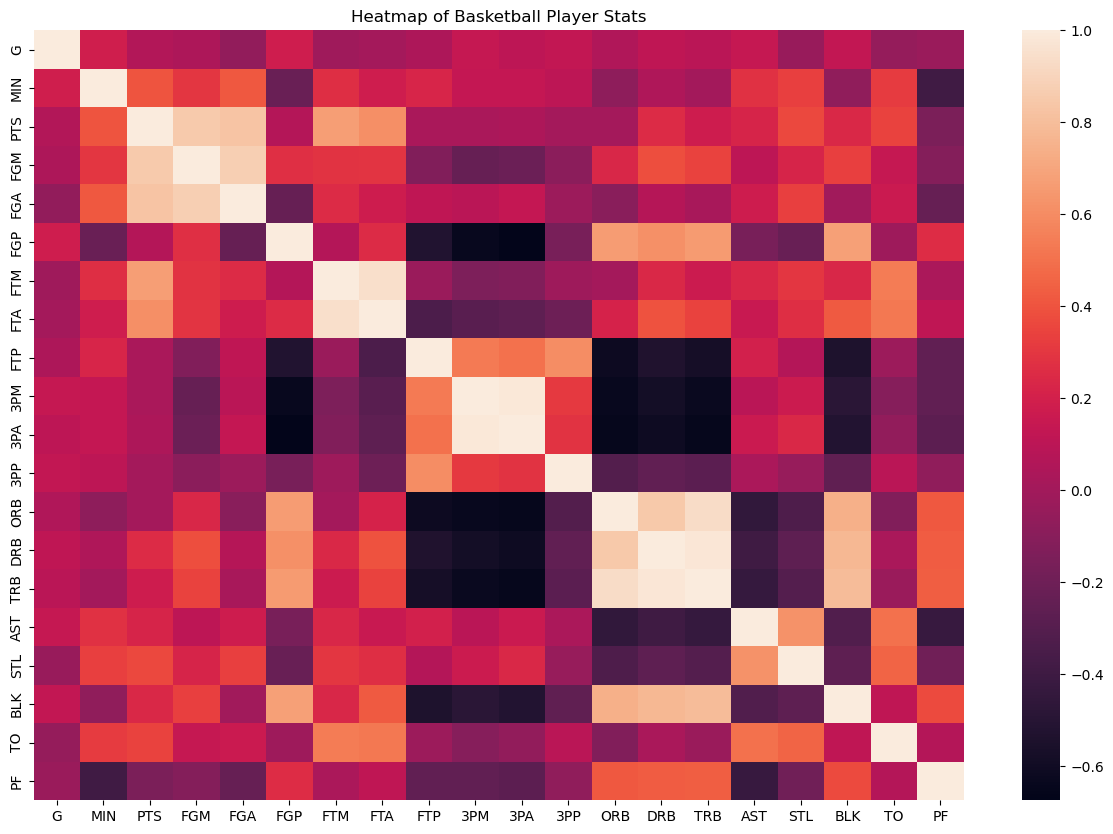

In [6]:
# To create a heatmap, which focuses on outputting the correlation coefficients of each variable relative to the other 
# variables within a dataset, I will use Seaborn's heatmap() function. This will realize the correlation statistics for each
# variable that is a float value, so for this to work, I will remove the 'Name' column from the NBA dataset using the drop()
# function. I will compute the correlation matrix needed for the heatmap by utilizing the corr() function. To display the 
# variable labels on the heatmap, I have set both the xticklabels and yticklabels arguments to True.

ppg_stats = ppg.drop(['Name  '], axis = 1)
player_stats = ppg_stats.corr()

player_stats.to_csv('player_stats_corr_matrix.csv', index = False)

plt.figure(figsize = (15, 10))
sns.heatmap(player_stats, xticklabels = True, yticklabels = True)
plt.title("Heatmap of Basketball Player Stats")
plt.show()

## Visualization 2: Spatial Chart

<Figure size 1500x1000 with 0 Axes>

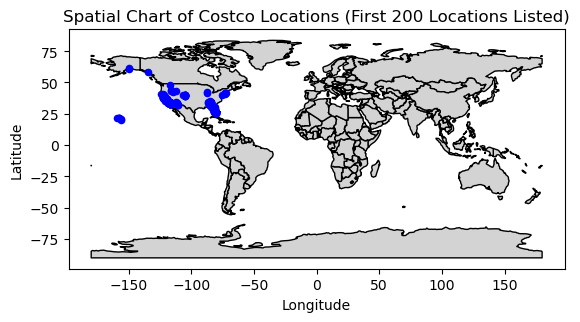

In [4]:
# To craft a spatial chart in Python, the GeoPandas library is needed as well as the Shapely library. GeoPandas is 
# necessary to transform a DataFrame containing latitude and longitude values into a GeoDataFrame which is compatible with 
# spatial charts. Shapely allows the latitude/longitude coordinates within the DataFrame to be converted into points that 
# can be smoothly placed into a new GeoDataFrame. I will import the libraries here. 

import geopandas as gpd
from shapely.geometry import Point

# To create the points from the latitude/longitude coordinates, Shapely has the Point() function which I will utilize along
# with the zip() function and a for loop that iterates through each observation within the original Costco DataFrame to 
# extract the coordinates needed. 

geometry = [Point(xy) for xy in zip(costco.Longitude, costco.Latitude)]

# The GeoDataFrame() function will turn the original dataset into a geodataset using the geometry points that were made.

costco_geocoded = gpd.GeoDataFrame(costco, geometry = geometry)

# After researching on how to display a world map in Python for the geocoded locations to be visualized, I managed to find 
# the Natural Earth website that allowed me to download a map of the world that can be read into Python using GeoPandas's 
# read_file() function. 

world = gpd.read_file('ne_110m_admin_0_countries.shp')

# The spatial plot is crafted here with the ax argument for the geocoded data plot set to display the shapefile of the world
# map from Natural Earth so the points can be visualized according to where they belong on the map. I have used the first 
# 200 observations in the dataset to plot on the world map using the head() function.

plt.figure(figsize = (15, 10))
ax = world.plot(color = 'lightgray', edgecolor = 'black')
costco_geocoded.head(200).plot(ax = ax, marker = 'o', color = 'blue', markersize = 20)
plt.title("Spatial Chart of Costco Locations (First 200 Locations Listed)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Visualization 3: Lollipop Chart

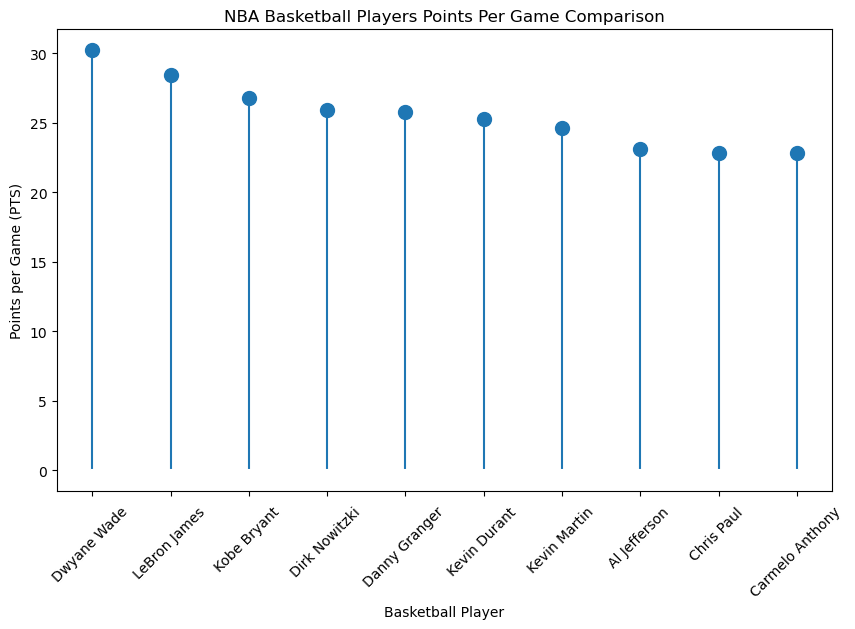

In [5]:
# For the lollipop chart, Matplotlib has a stem() function that can be paired with the scatter() function to display the 
# lines attached to the points on a chart, crafting the lollipop look. I have decided to plot the points per game for the 
# first ten players listed in the NBA dataset. I have sorted the dataset by the points per game variable with sort_values().

# The stem() function and the scatter() function are both used to create the lollipop chart here. I have used the head() 
# function to segregate and plot the first ten players listed in the dataset along with their points per game values. To 
# make the chart's output cleaner, the basefmt argument is set to 'w' to rid the chart of the red base line at the bottom.

plt.figure(figsize = (10, 6))
plt.stem(ppg['Name  '].head(10), ppg['PTS'].head(10), basefmt = 'w')
plt.scatter(ppg['Name  '].head(10), ppg['PTS'].head(10), s = 100)

plt.xlabel('Basketball Player')
plt.ylabel('Points per Game (PTS)')
plt.title('NBA Basketball Players Points Per Game Comparison')
plt.xticks(rotation = 45)
plt.show()